### Exercises Chapter 10 from the Introduction to Statistical Learning book

#### Exercise 3

In [43]:
set.seed(123)

x <- cbind(c(1,1,0,5,6,4), c(4,3,4,1,2,0))
x

1,4
1,3
0,4
5,1
6,2
4,0


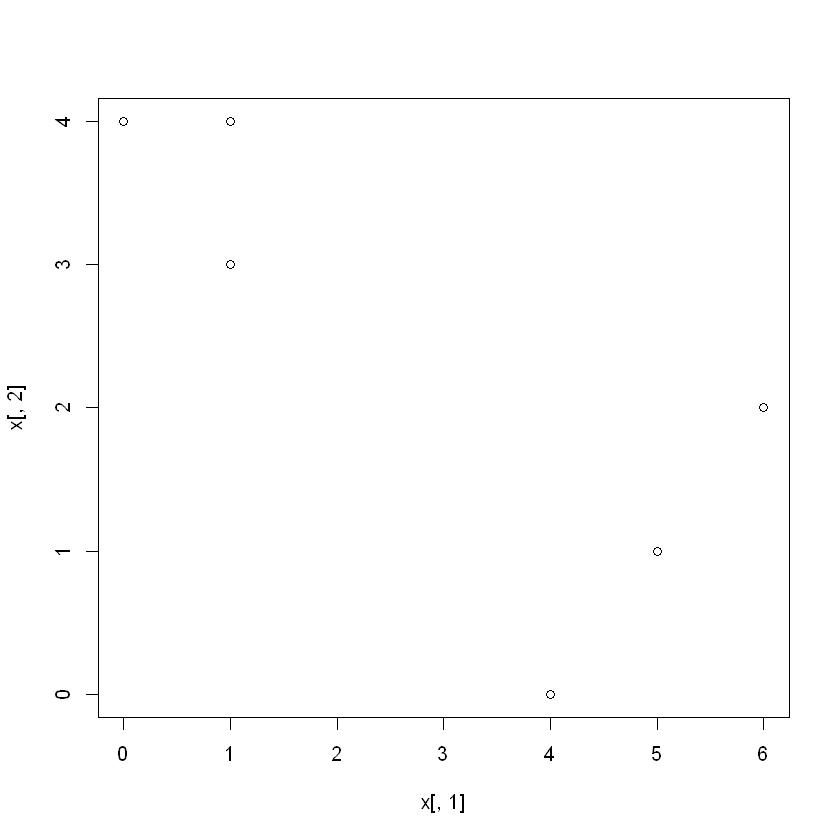

In [44]:
#(a)
plot(x[,1], x[,2])

In [45]:
#(b)
labels <- sample(2, nrow(x), replace=T)

In [46]:
#(c)
centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
centroid1 
centroid2

[1] 2.00 3.25

[1] 4.5 0.5

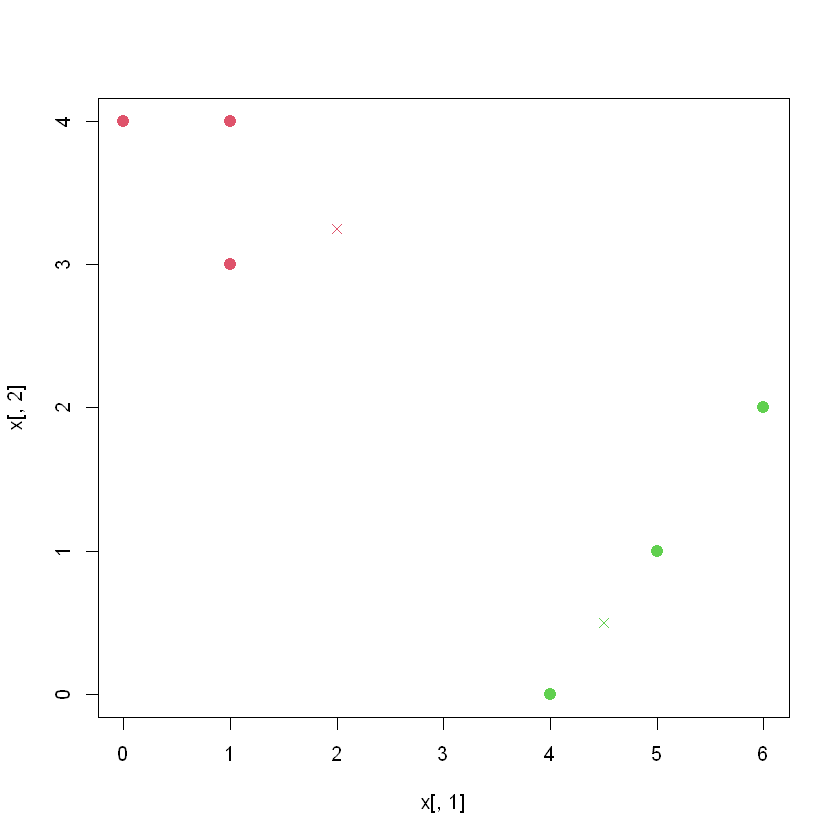

In [47]:
#(d)
labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex =2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

#### Exercise 4

#### Exercise 8

In [48]:
#(a)
library(ISLR)
set.seed(123)

pr.out = prcomp(USArrests, scale=TRUE)
pr.var=pr.out$sdev^2
pve=pr.var/sum(pr.var)

pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### Exercise 9

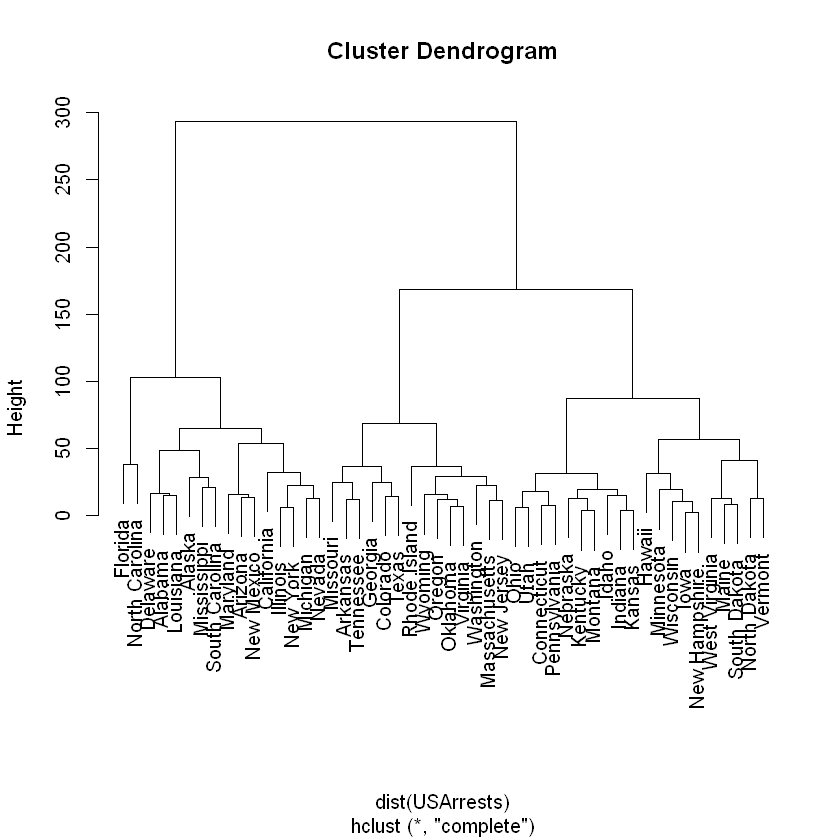

In [57]:
#(a)
set.seed(123)

hc <- hclust(dist(USArrests), method = "complete")
plot(hc)

In [51]:
#(b)
hc.clusters = cutree(hc, 3)
hc.clusters

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

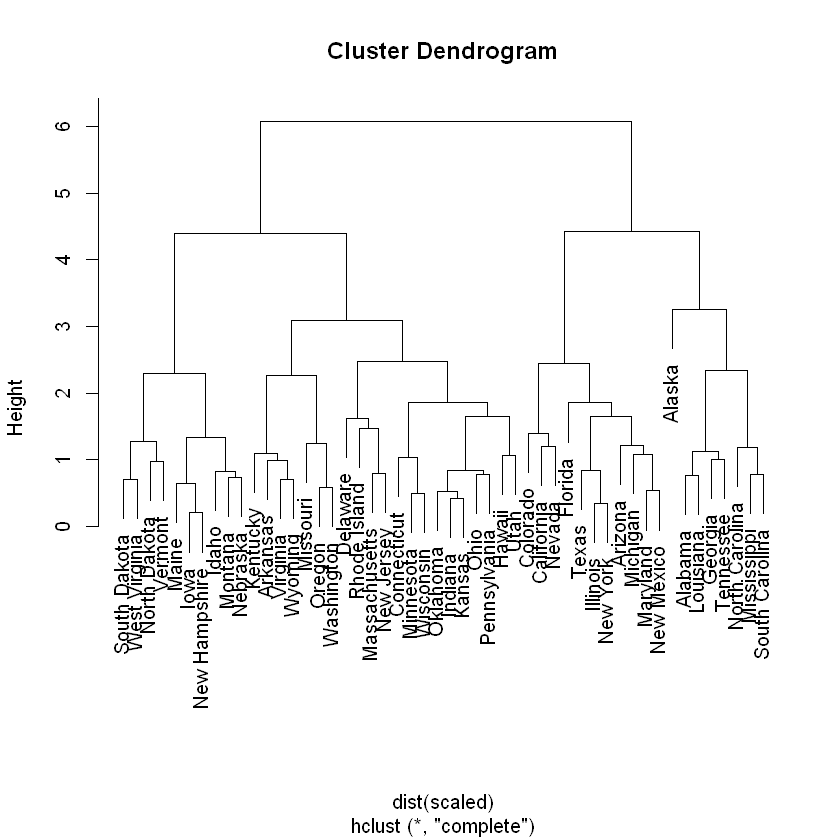

In [52]:
#(c)
scaled <- scale(USArrests)
hc.scaled <- hclust(dist(scaled), method = "complete")
plot(hc.scaled)

In [53]:
#(d)
# It seems as though when data is scaled the information provided is more interpretable. 
# Also all the elements seem to be on the same level which helps to cut the dendogram where we want exactly. 

#### Exercise 10

In [92]:
#(a)
set.seed(123)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

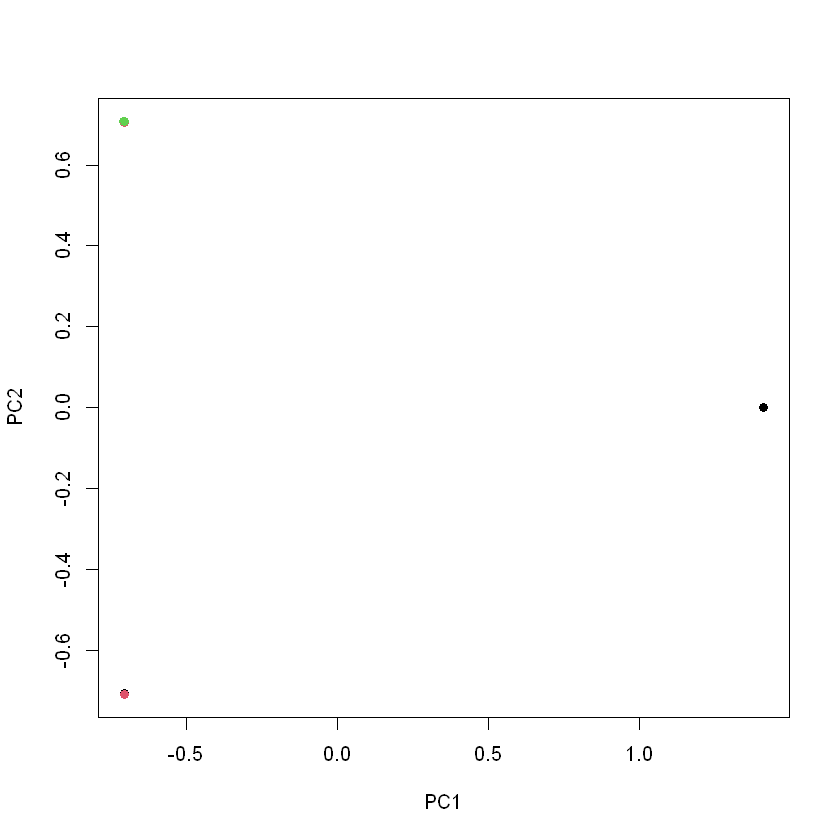

In [93]:
#(b)
pr.out <- prcomp(x)
plot(pr.out$x[, 1:2], col = 1:3, pch = 19)

In [94]:
#(c)
km.out <- kmeans(x, 3, nstart = 20)
table(c(rep(1,20), rep(2,20), rep(3,20)), km.out$cluster)

   
     1  2  3
  1  0 20  0
  2 20  0  0
  3  0  0 20

In [95]:
#(d)
km.out.2 <- kmeans(x, 2, nstart = 20)
table(c(rep(1,20), rep(2,20), rep(3,20)), km.out.2$cluster)

   
     1  2
  1  0 20
  2 20  0
  3  0 20

In [96]:
#(e)
km.out.4 <- kmeans(x, 4, nstart = 20)
table(c(rep(1,20), rep(2,20), rep(3,20)), km.out.4$cluster)

   
     1  2  3  4
  1 20  0  0  0
  2  0 20  0  0
  3  0  0 11  9

In [97]:
#(d)
km.out.pc = kmeans(pr.out$x[,1:2], 3, nstart=20)
table(km.out.pc$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1 20  0  0
  2  0  0 20
  3  0 20  0

In [99]:
#(e)
km.out.scaled = kmeans(scale(x), 3, nstart=20)
table(km.out.scaled$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

# The clusters are not as well separated as in question (b)

   
     1  2  3
  1  2 11  3
  2 10  5 11
  3  8  4  6